``Naive implementation K-means Clustering``

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import os
import time

RAND = 3455
np.random.seed(RAND)
os.environ['PYTHONHASHSEED'] = str(RAND)

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=RAND, cluster_std=1.9)
X.shape, y.shape

((500, 2), (500,))

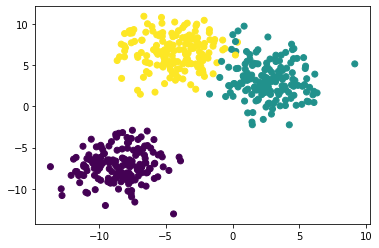

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RAND, test_size=0.2)

 **K-means clustering**
 
- unsupervised learing algorithm
- time complexity is O(n_samples*k_iterations)

**Algorithm**
- intialize random k-centroids
- assign every datapoint to its nearest centroid
- recalculate new centroids
- repeat this until no change in centroids

In [28]:
class KMeans:
    def __init__(self, k, n_iters=100):
        self.k = k
        self.centroids = None
        self.clusters = None
        self.is_fit = False
        self.n_iters = n_iters
        
    def fit(self, X):
        n_samples, n_fts = X.shape
        
        # random intitial centroids
        init_centroids_idx = np.random.choice(n_samples, size=self.k)
        cur_centroids = X[init_centroids_idx]
        
        print('Intial Centroids:\n', cur_centroids)

        for iteration in range(self.n_iters):
            # assign data points to their nearest centroid
            self.clusters = self._get_nearest_centroids(X, cur_centroids)        # list showing assigned clusters for each sample

            #  update centroids
            self.centroids = self._get_new_centroids(X, self.clusters)          # list of feature vectors of each centroid
            
            # check for convergence
            if np.array_equal(cur_centroids, self.centroids):
                print(cur_centroids)
                print(self.centroids)
                break
            else:
                cur_centroids = self.centroids

            # break
        
        print(f"Converged in {iteration} iterations")
        self.is_fit = True
        
        return self
        
        
    def _get_nearest_centroids(self, X, cur_centroids):
        """ calculate distance from each sample to every centroid and assign each sample to nearest centroid and return the list of centroids"""
        assigned_clusters = []
        for sample in X:
            dist_2_centre = []
            for centre in cur_centroids:
                dist = self._euclid_dist(sample, centre)
                dist_2_centre.append(dist)
                
            dist_2_centre = np.array(dist_2_centre)
            assigned_clusters.append(dist_2_centre.argmin())
        return assigned_clusters
                
    def _get_new_centroids(self, X, cluster_labels):
        """updates centroids for each cluster"""
        new_centroids = []
        # group similar clusters and find calculate new clusters
        for i in range(self.k):
            group = self._get_cluster(X, cluster_labels=cluster_labels, required_cluster=i)
            new_centroid  = np.mean(group, axis=0)   # axis 0 refers to collapsing on rows
            new_centroids.append(new_centroid)
        return np.array(new_centroids)


    def _get_cluster(self, X, cluster_labels, required_cluster):
        """ retrieves all samples for a given cluster label"""
        cluster = []
        for idx, label in enumerate(cluster_labels):
            if label == required_cluster:
                cluster.append(X[idx])
        cluster = np.array(cluster)
        return cluster
        
                
    def _euclid_dist(self, s, c):
        return np.sqrt(np.sum((s-c)**2))
        
    def predict(self, X):
        if self.is_fit:
            predicted_clusters = self._get_nearest_centroids(X, self.centroids)
            return np.array(predicted_clusters)
        else:
            raise Exception('First Fit bruv...')


    def __repr__(self) -> str:
        return "KMeans"

In [29]:
km = KMeans(k=3)
km.fit(X_train)

In [9]:
preds = km.predict(X_test)
preds

array([2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2,
       1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1], dtype=int64)

In [10]:
y_test

array([2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1,
       2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0])

In [13]:
# from sklearn.metrics import jaccard_score
# jaccard_score(y_test, preds, average='macro')  

0.3170731707317073

In [14]:
from sklearn.cluster import KMeans as Sk_Kmeans
k = Sk_Kmeans(n_clusters=3, random_state=RAND, verbose=False)
k.fit(X_train)
print(f"converged in {k.n_iter_} iterations")
sk_preds = k.predict(X_test)
sk_preds

converged in 4 iterations


array([2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2,
       1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1])

In [ ]:
# jaccard_score(y_test, sk_preds, average='macro')

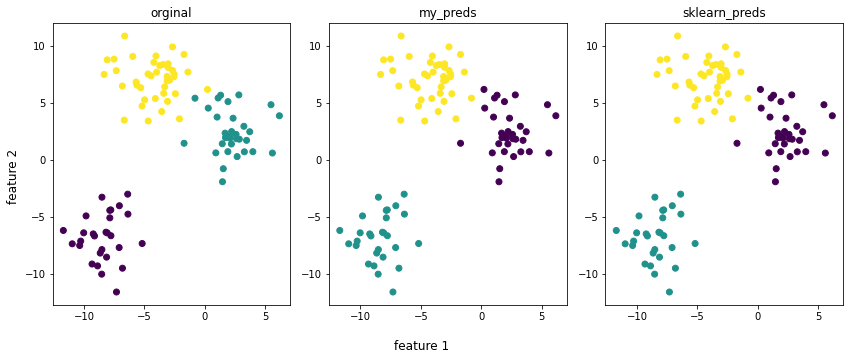

In [34]:
fig, ax = plt.subplots(1, 3, figsize = (12, 5))
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=preds)
ax[2].scatter(X_test[:, 0], X_test[:, 1], c=sk_preds)

ax[0].title.set_text('orginal')
ax[1].title.set_text('my_preds')
ax[2].title.set_text('sklearn_preds')

fig.supxlabel('feature 1')
fig.supylabel('feature 2')

fig.tight_layout()

- Here I simply chose 3 clusters becuase I created the data and I know in advance, however in practice we may not know the no. of clusters before hand.
- Since we may not know how many clusters the data can be best grouped into... Elbow method is used to determine the clusters

- Few Drawbacks of K-means include:
  
  Effect of curse of dimensionality in large feature spaces due to elongated (euclidean space) [PCA is a possible solution]

  This algo. assumes the clusters are circular or Non-elongated, so manifolds with different shapes may not work well...